### Question 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import levy_stable
import math

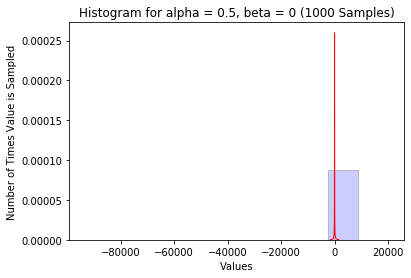

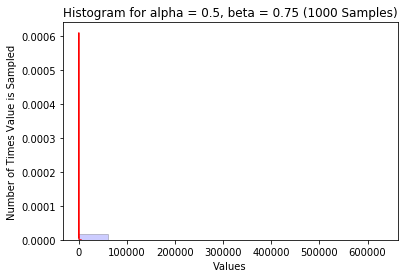

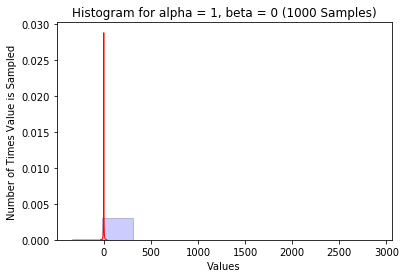

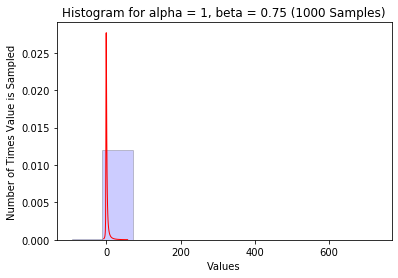

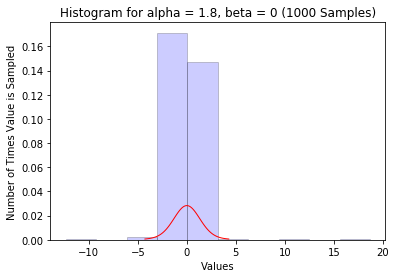

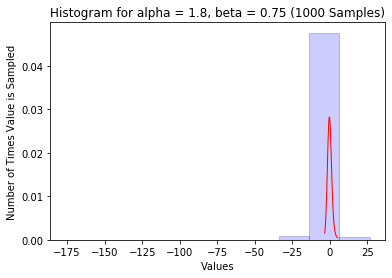

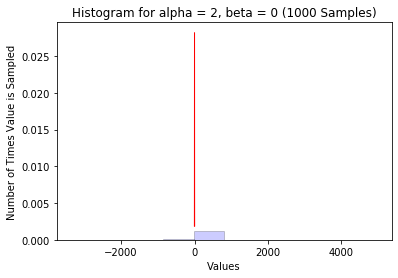

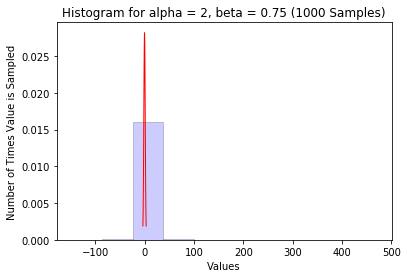

In [5]:
alphas = [.5, 1, 1.8, 2]
betas = [0, 0.75]

for alpha in alphas:
    for beta in betas:
        X = np.empty(1000)
        if (alpha != 1):
            
            B_ab = np.arctan(beta * np.tan(math.pi*alpha/2))/alpha
            #print(B_ab)
            S_ab =  math.pow( 1 + (math.pow(beta,2) * np.tan(math.pi*alpha/2)), 1/(2*alpha) )
            #print(S_ab)
            W = np.random.exponential()
            #print(W)
            for i in range(0, len(X)):
                V = np.random.uniform(-1*math.pi/2,math.pi/2);
                #print(V)
                X[i] = S_ab * (math.sin(alpha*(V+B_ab))/ math.pow(math.cos(V), 1/alpha)) \
                    * math.pow((math.cos(V - alpha*(V+B_ab))/W), (1 - alpha)*alpha)
                #print(X[i])
        else:
            for i in range(0, len(X)):
                V = np.random.uniform(-1*math.pi/2,math.pi/2);
                W = np.random.exponential()
                #print(W)
                X[i] = (2/math.pi)*( (math.pi/2 + beta* V)* np.tan(V) \
                        - (beta * math.log(W*math.cos(V)/(math.pi/2 + beta*V))) )
                #print(X[i])
        
        fig, ax = plt.subplots(1, 1)
        x_1 = np.linspace(levy_stable.ppf(0.01, alpha, beta), levy_stable.ppf(0.99, alpha, beta), 100)
        ax.plot(x_1, levy_stable.pdf(x_1, alpha, beta)/10, 'r-', lw=1, label='levy_stable pdf')
        ax.hist(X, density=True, edgecolor = 'black', facecolor = 'blue', alpha=0.2)
        
        plt.xlabel("Values")
        plt.ylabel("Number of Times Value is Sampled")
        plt.title("Histogram for alpha = {a}, beta = {b} (1000 Samples)".format(a=alpha, b = beta ))
        plt.show()
        
        """
        fig, ax = plt.subplots()
        x = np.linspace(-20, 20,10000)
        rv = levy_stable(alpha, beta)
        ax.hist( X, edgecolor = 'black', facecolor = 'blue')
        ax.legend(loc='best', frameon=False)
        ax.plot(x, rv.pdf(x), ms=8, label='Theoretical PDF (Scaled)', color = 'red')
        plt.xlabel("Values")
        plt.ylabel("Number of Times Value is Sampled")
        plt.title("Histogram for alpha = {a}, beta = {b} (1000 Samples)".format(a=alpha, b = beta ))
        #plt.xlim(0, 10000)
        plt.show()
        """
                
        #print(max(X))
        


#### Question 3 Analysis

- The 8 histograms above show the different combinations of alpha and beta values and that affects the different alpha stable distributions. 
- For values of alpha between one and two, the distribution is a little wider and follows more of a curve.
- For values of alpha less than one, the values generated by X are larger. 